In [53]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle
import tensorflow as tf

In [54]:
pickle_file = 'br6class14DReg.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 28, 28) (60000, 1)
Test set (600, 28, 28) (600, 1)


In [55]:
image_size = 28
num_labels = 6

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 784) (60000, 1)
Test set (600, 784) (600, 1)


In [57]:
learning_rate = 0.01
train_subset = 3
training_epochs = 1
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,1])
weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, 1]))
biases = tf.Variable(tf.zeros([1]))

init = tf.global_variables_initializer()

logits = tf.matmul(X, weights) + biases
loss = tf.reduce_mean(tf.square(logits - Y))
  
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
optimizer = tf.train.GradientDescentOptimizer(0.00000000000000000000005).minimize(loss)

sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    train_x = train_dataset[:train_subset, :]
    train_y = train_labels[:train_subset]
    #print(train_x[0])
    #print(train_y[0])
    sess.run(optimizer,feed_dict={X:train_dataset[:train_subset, :],Y:train_labels[:train_subset]})
    cost_history = np.append(cost_history,sess.run(loss,
                                    feed_dict={X: train_dataset[:train_subset, :],Y: train_labels[:train_subset]}))
    print(epoch, sess.run(weights), sess.run(biases), logits)
    #x1 = sess.run(weights)
    #print(x1)


0 [[ -9.85867918e-01]
 [ -6.27703846e-01]
 [ -1.12469685e+00]
 [  7.99966633e-01]
 [ -1.42355716e+00]
 [ -1.35176599e+00]
 [ -5.52709997e-01]
 [  2.98340619e-01]
 [  1.65622222e+00]
 [  5.45528471e-01]
 [  3.30400795e-01]
 [ -6.90657675e-01]
 [  6.34165555e-02]
 [ -1.16025686e+00]
 [  1.20507181e+00]
 [  1.10441291e+00]
 [ -7.11645603e-01]
 [  7.04496503e-01]
 [ -1.14432335e+00]
 [ -1.00607753e+00]
 [ -1.03989542e+00]
 [ -2.90758610e-01]
 [  1.17723727e+00]
 [  1.44788551e+00]
 [  1.13197351e+00]
 [  1.05720091e+00]
 [ -3.69680703e-01]
 [  1.52255678e+00]
 [  1.40927505e+00]
 [ -4.55696166e-01]
 [  5.11840165e-01]
 [ -6.80476427e-01]
 [  4.69866902e-01]
 [ -1.05424249e+00]
 [  4.77195889e-01]
 [  4.17009920e-01]
 [  3.79363865e-01]
 [  1.27665007e+00]
 [ -1.36503637e+00]
 [  1.47718996e-01]
 [ -4.77679521e-01]
 [  1.50591445e+00]
 [ -7.88063645e-01]
 [  5.43058574e-01]
 [  6.42780960e-01]
 [  7.34139204e-01]
 [ -2.05077931e-01]
 [  1.10380054e+00]
 [  4.28353518e-01]
 [  1.41038859e+00

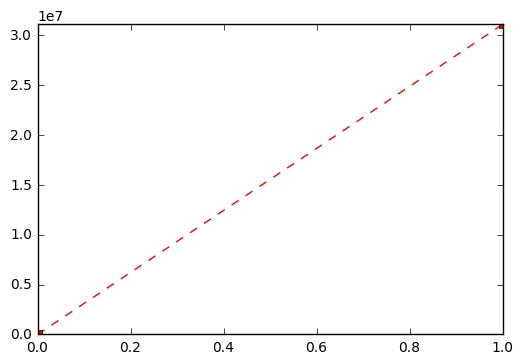

array([  5.00000000e-23,   3.10852880e+07])

In [58]:
plt.plot(range(len(cost_history)),cost_history, 'rs--')
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()
cost_history

In [59]:
cost_history

array([  5.00000000e-23,   3.10852880e+07])

In [60]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 784) (60000, 1)
Test set (600, 784) (600, 1)


In [61]:
train_x = train_dataset
train_y = train_labels
test_x = test_dataset
test_y = test_labels

In [81]:
learning_rate = 0.0000000000001
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([784,1]))

init = tf.global_variables_initializer()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [82]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))

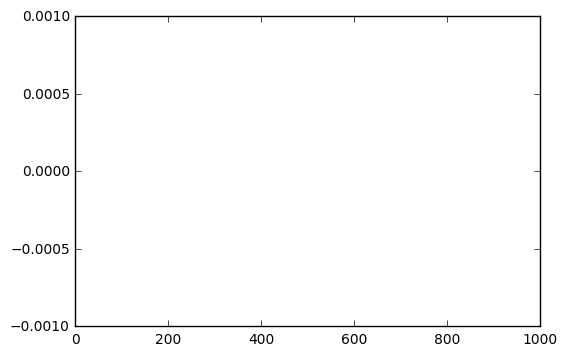

In [84]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

MSE: 13985141760.0000


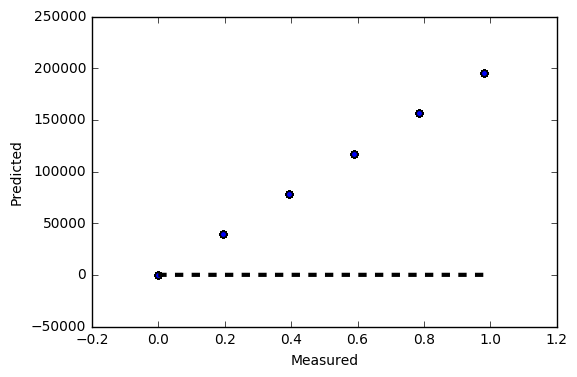

In [85]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [86]:
cost_history

array([             nan,   1.40852500e+10,   1.40852419e+10, ...,
         1.39849974e+10,   1.39848294e+10,   1.39848192e+10])

In [87]:
cost_history[1:10]

array([  1.40852500e+10,   1.40852419e+10,   1.40852255e+10,
         1.40851907e+10,   1.40851845e+10,   1.40851640e+10,
         1.40850381e+10,   1.40849193e+10,   1.40849132e+10])